In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

In [2]:
df = pd.read_csv("Desktop/credits.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

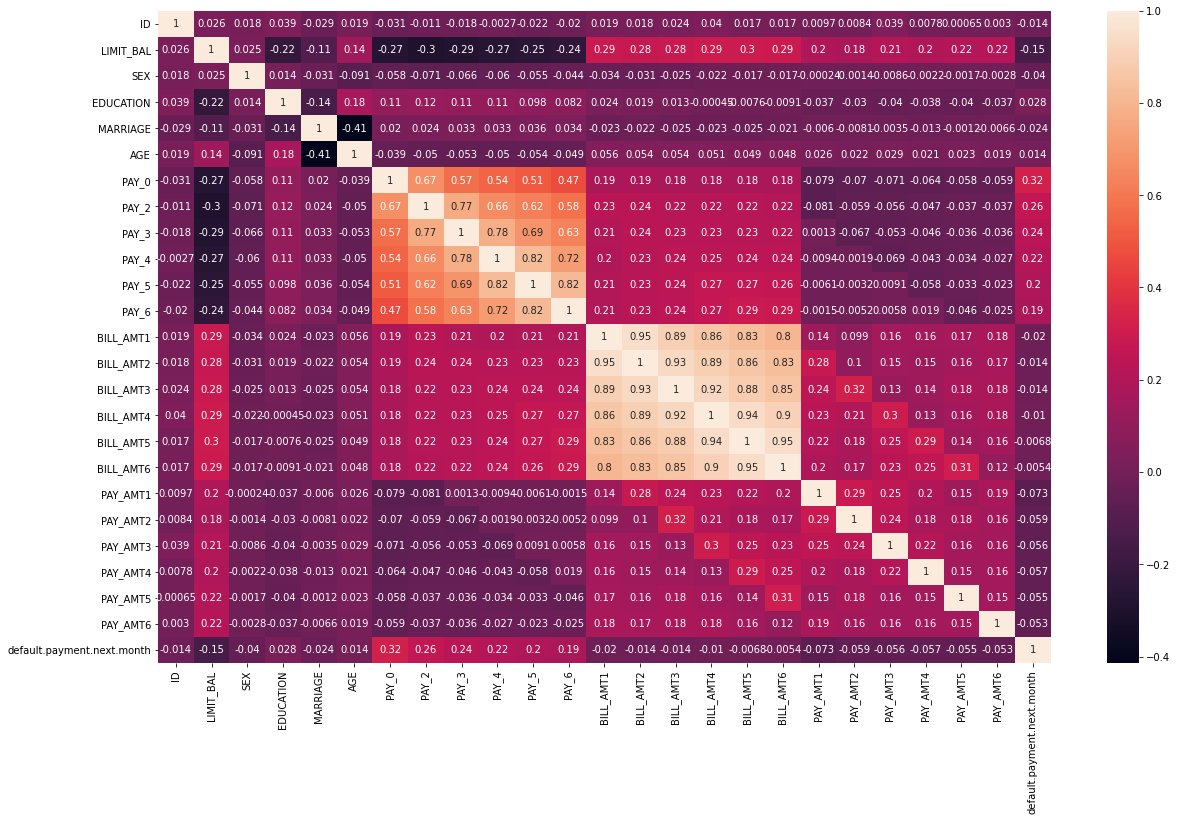

In [3]:
corr = df.corr() # co relations columns

plt.figure(figsize = (20, 12))
sns.heatmap(corr, annot=True)
plt.show()

In [4]:
df.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

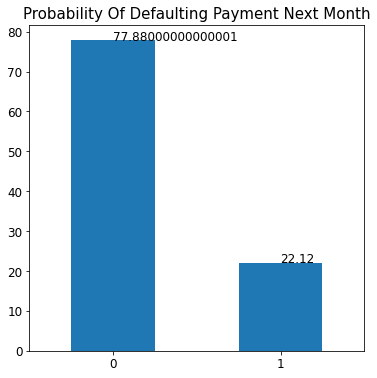

In [5]:
def_cnt = (df.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

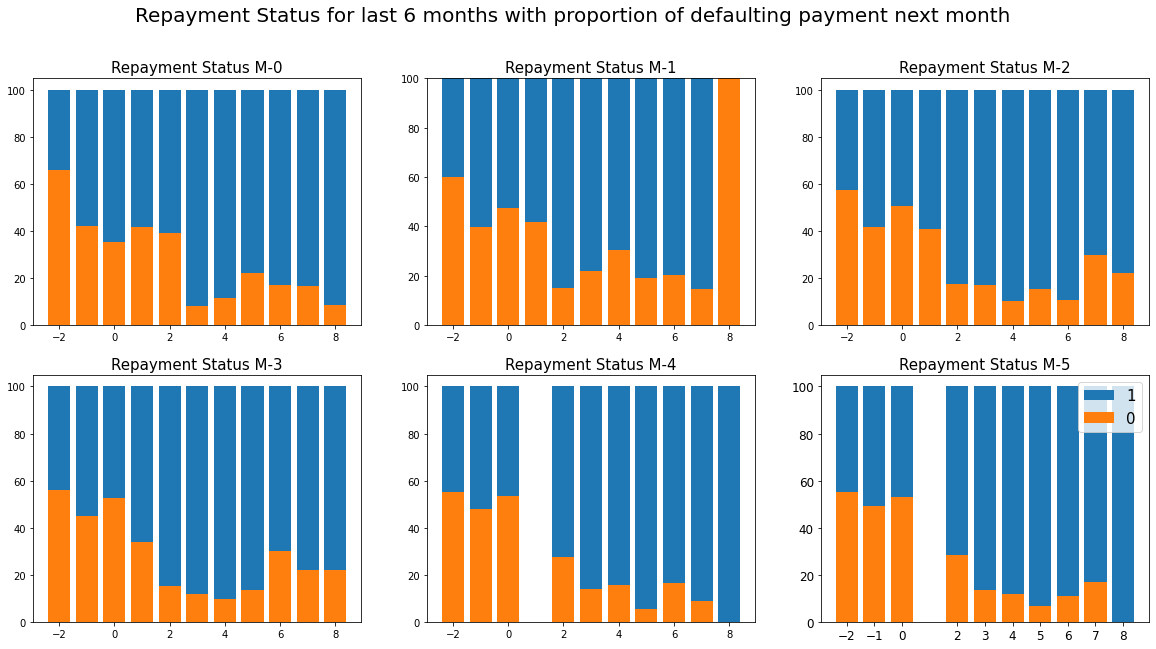

In [6]:
plt.subplots(figsize=(20,10))

ind = sorted(df.PAY_1.unique())
pay_0 = (df.PAY_1[df['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_1[df['def_pay'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(df.PAY_2.unique())
pay_0 = (df.PAY_2[df['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_2[df['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(df.PAY_3.unique())
pay_0 = (df.PAY_3[df['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_3[df['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(df.PAY_4.unique())
pay_0 = (df.PAY_4[df['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_4[df['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(df.PAY_5.unique())
pay_0 = (df.PAY_5[df['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_5[df['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(df.PAY_6.unique())
pay_0 = (df.PAY_6[df['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_6[df['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()


In [7]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [8]:
#Preprocessing...

def prepro_dataset(df):
    df = df.copy()
    df = df.drop('ID', axis=1)
    
    # need to look at oneshot
    df = onehot_encode(
        df,
        {
            'EDUCATION': 'EDU',
            'MARRIAGE': 'MAR'
        }
    )
    
    
    y = df['def_pay'].copy()                     # Spliting 
    x = df.drop('def_pay', axis=1).copy()
    
   
    scaler = StandardScaler()
    x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    
    return x, y

In [9]:
x,y = prepro_dataset(df)

In [10]:
# Training........

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=50)

models = {LogisticRegression(): "Logistic Regression"}
   
for model in models.keys():
    model.fit(x_train, y_train)
    
 
for model, name in models.items():
    print(name + ": {:.2f}%".format(model.score(x_test, y_test) * 100))   

Logistic Regression: 82.03%


In [11]:
y_pred = model.predict(x_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8313
           1       0.26      0.72      0.38       687

    accuracy                           0.82      9000
   macro avg       0.62      0.78      0.64      9000
weighted avg       0.92      0.82      0.86      9000

[[6885 1428]
 [ 189  498]]
